## Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a __regression model using regularisation__ in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

 

Also, determine the __optimal value of lambda for ridge and lasso regression__.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 

## Steps we will perform to create a __Regression Model__ using __Regularization__:

* Importing Data
* Cleaning
* EDA
* Data tranformation (creating dummies, ...)
* Splitting data to trian and test sets
* Scaling data sets
* Feature selection using RFE
* Lasso model
    * Selecting Hyper parameter
* Ridge model
    * Selecting Hyper parameter
* Final Model

In [1]:
# importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
# reading data
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### cleaning data

In [6]:
# checking nulls
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# checking null percentages
((df.isnull().sum()/len(df.index))*100).sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

__Since, there are columns with many nulls, let's take 15% as threshold for null value % and drop the columns above 15% missing values__

In [8]:
# dropping columsn with null values above 15%
cols_to_drop = df.loc[:, list((df.isnull().sum()/len(df.index)) >= 0.15)].columns
df = df.drop(cols_to_drop, axis='columns')

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


__Let's try to impute missing values of other columns__

In [10]:
(df.isnull().sum()/len(df.index)).sort_values(ascending=False)

GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageCond       0.055479
GarageQual       0.055479
                   ...   
CentralAir       0.000000
HeatingQC        0.000000
SaleCondition    0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 75, dtype: float64

In [11]:
# let's see what are the columns with missing values
cols_with_nulls = df.loc[:, list((df.isnull().sum()/len(df.index)) > 0.00)].columns
cols_with_nulls

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [12]:
df[cols_with_nulls].mode()

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,None,0.0,TA,TA,No,Unf,Unf,SBrkr,Attchd,2005.0,Unf,TA,TA


In [13]:
# fillling the missings values for categorical variables with mode
df.MasVnrType.fillna('None',inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.Electrical.fillna('SBrkr',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

_Let's convert the year columns to integers with max value as upper bound and the difference as value. This will give "__how old it is__". So, appending _old to the columns_

In [14]:
df['YearBuilt_Old'] = df.YearBuilt.max()-df.YearBuilt
df['YearRemodAdd_Old'] = df.YearRemodAdd.max()-df.YearRemodAdd
df['GarageYrBlt_Old'] = df.GarageYrBlt.max()-df.GarageYrBlt
df['YrSold_Old'] = df.YrSold.max()-df.YrSold
df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
237,1993,2003,1993.0,2010,17,7,17.0,0
2,2001,2002,2001.0,2008,9,8,9.0,2
615,1963,1963,1963.0,2010,47,47,47.0,0
1283,1971,1971,NaN,2010,39,39,NaN,0
246,1910,1950,1910.0,2006,100,60,100.0,4
523,2007,2008,2007.0,2007,3,2,3.0,3
1227,1965,2008,1992.0,2008,45,2,18.0,2
1305,2006,2007,2006.0,2009,4,3,4.0,1
187,1916,1987,1916.0,2009,94,23,94.0,1
1222,1949,1950,1949.0,2007,61,60,61.0,3


In [15]:
# dropping actual columns
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

_Let's treat the numerical columns for missing values_

Let's check the missing values percentage of the remaining columns

In [16]:
((df.isnull().sum()/len(df.index))*100).sort_values(ascending=False)

GarageYrBlt_Old    5.547945
MasVnrArea         0.547945
BsmtCond           0.000000
Exterior2nd        0.000000
MasVnrType         0.000000
                     ...   
TotRmsAbvGrd       0.000000
Functional         0.000000
Fireplaces         0.000000
GarageType         0.000000
Id                 0.000000
Length: 75, dtype: float64

In [17]:
# since, the % of mising values for MasVnrArea is less than 1%, Let's drop the rows
df.drop(df[df['MasVnrArea'].isna()].index, inplace=True)

In [18]:
# checking the missing vlaues perentage
((df.isnull().sum()/len(df.index))*100).sort_values(ascending=False)

GarageYrBlt_Old    5.578512
BsmtCond           0.000000
Exterior2nd        0.000000
MasVnrType         0.000000
MasVnrArea         0.000000
                     ...   
TotRmsAbvGrd       0.000000
Functional         0.000000
Fireplaces         0.000000
GarageType         0.000000
Id                 0.000000
Length: 75, dtype: float64

In [19]:
# as for GarageYrBlt_Old and YearBuilt_Old, let's check if there is a garage for the NaN's
print(df['GarageYrBlt_Old'].mean())
print(df[df['GarageYrBlt_Old'].isna()].loc[:,['GarageType','YearBuilt_Old']].sample(5))

31.62582056892779
     GarageType  YearBuilt_Old
148      Attchd              6
89       Attchd             16
155      Attchd             86
614      Attchd             38
1219     Attchd             39


In [20]:
# filling the NaN's with YearBuilt_Old as garage cannot be older than year built
df.loc[df['GarageYrBlt_Old'].isna(),'GarageYrBlt_Old'] = df.loc[df['GarageYrBlt_Old'].isna(),'YearBuilt_Old']

In [21]:
# checking for missing values
((df.isnull().sum()/len(df.index))*100).sort_values(ascending=False).head(20)

YrSold_Old      0.0
RoofMatl        0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
Exterior1st     0.0
RoofStyle       0.0
HeatingQC       0.0
dtype: float64

##### All missing values are now treated

#### From the given data, ID column will not be of any use for the analysis. So, let's drop Id column

In [22]:
# dropping id column
df.drop('Id',axis='columns',inplace=True)

In [23]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 

__Dropping outliers of all numerical columns__

In [24]:
# getting all numerical columns
num_col = list(df.dtypes[df.dtypes !='object'].index)

In [25]:
df[num_col].describe([0.05,0.10,0.25,0.50,0.75,0.99])

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,56.949036,10507.276171,6.092975,5.579201,103.685262,441.970386,46.805785,567.070937,1055.847107,1161.270661,...,3.428375,15.143939,2.774105,43.728650,6.318182,180615.063361,38.883609,25.224518,33.628099,2.184573
std,42.340097,9989.563592,1.381289,1.113136,181.066207,455.360279,161.726239,442.082927,438.119089,385.018424,...,29.396943,55.899665,40.287389,497.478278,2.699644,79285.541485,30.193761,20.652466,26.304729,1.328927
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
5%,20.000000,3277.300000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,513.700000,672.550000,...,0.000000,0.000000,0.000000,0.000000,2.000000,88000.000000,3.000000,3.000000,3.000000,0.000000
10%,20.000000,5000.100000,5.000000,5.000000,0.000000,0.000000,0.000000,74.100000,636.100000,756.100000,...,0.000000,0.000000,0.000000,0.000000,3.000000,106275.000000,4.000000,4.000000,4.000000,0.000000
25%,20.000000,7538.750000,5.000000,5.000000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129900.000000,10.000000,6.000000,9.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,162700.000000,38.000000,17.000000,32.000000,2.000000
75%,70.000000,11600.000000,7.000000,6.000000,166.000000,706.500000,0.000000,808.000000,1297.250000,1391.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,44.000000,51.000000,3.000000
99%,190.000000,37775.960000,10.000000,9.000000,791.920000,1572.490000,831.820000,1797.450000,2155.450000,2211.900000,...,168.000000,268.450000,0.000000,700.000000,12.000000,439377.800000,110.980000,60.000000,99.490000,4.000000


In [26]:
# this function removes the outliers of each numerical column
def drop_outliers(x):
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [27]:
df.shape

(1432, 74)

finally, we are left with 1432 rows

### EDA
__Let's perform some basic EDA on the data__

Plotting correlation matrix with heat map to check the co relation between dependent and independent variable

In [28]:
# creating correlation matrix rounding to 2 decimals
corr_mat = round(df.corr(),2)

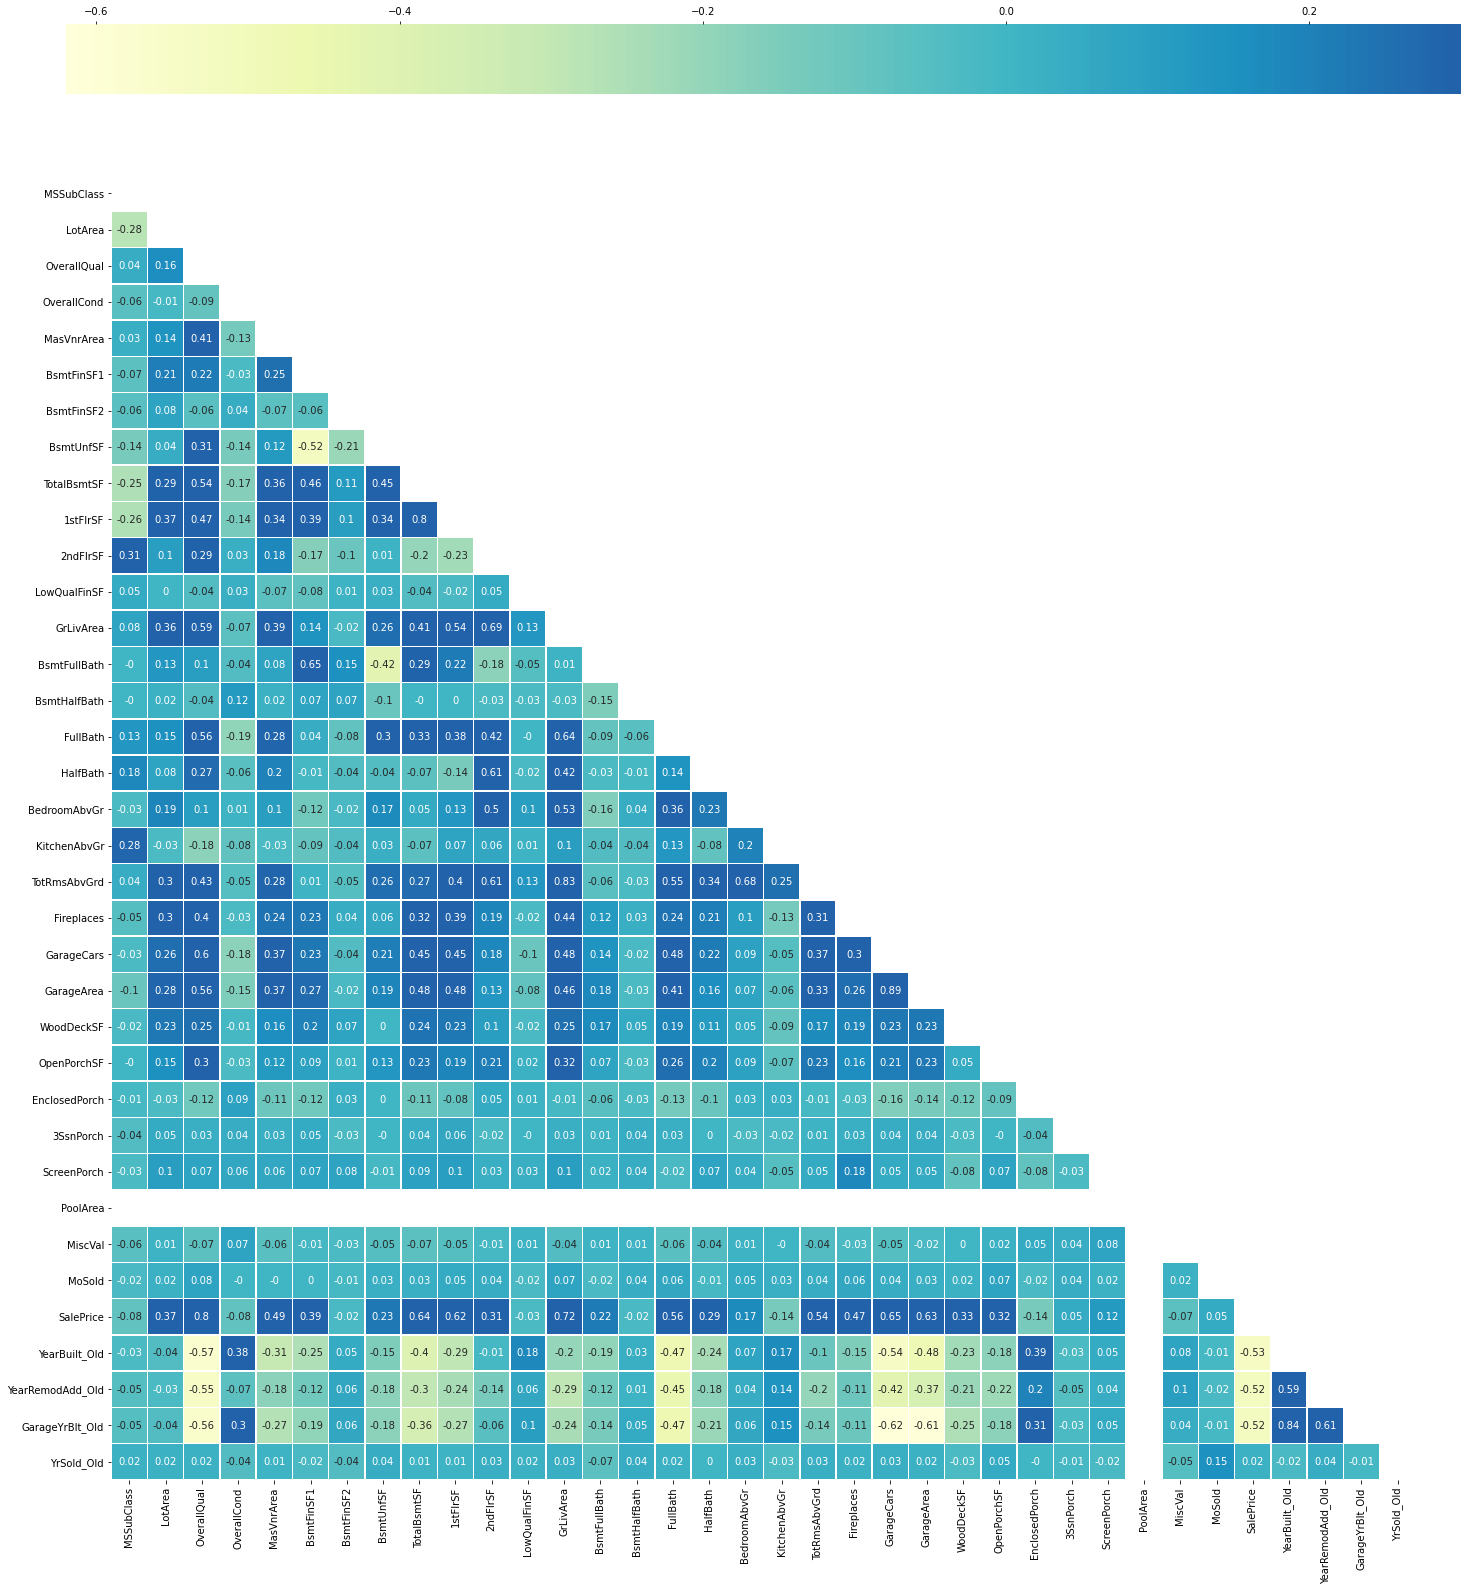

In [29]:
# creating a mask to print only onme half of the heatmap
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,30))
sns.heatmap(corr_mat, annot=True, linewidths=0.5, cmap="YlGnBu", center=0, mask=mask, vmax=.3, square=True,
            cbar_kws = dict(use_gridspec=False,location="top"))
plt.show()

from the heat map we can see, a __stong positive__ correlation between OverallQual, GrLivArea and SalePrice <br>
and, a resonable __positive__ correlation between TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars, GarageArea and SalePrice

And, a resonable __negative__ correlation between YearBuilt_Old, YearRemodAdd_Old, GarageYrBlt_Old and SalePrice

#### Let's plot some scatter plot to see the relation between among the above mentioned variables

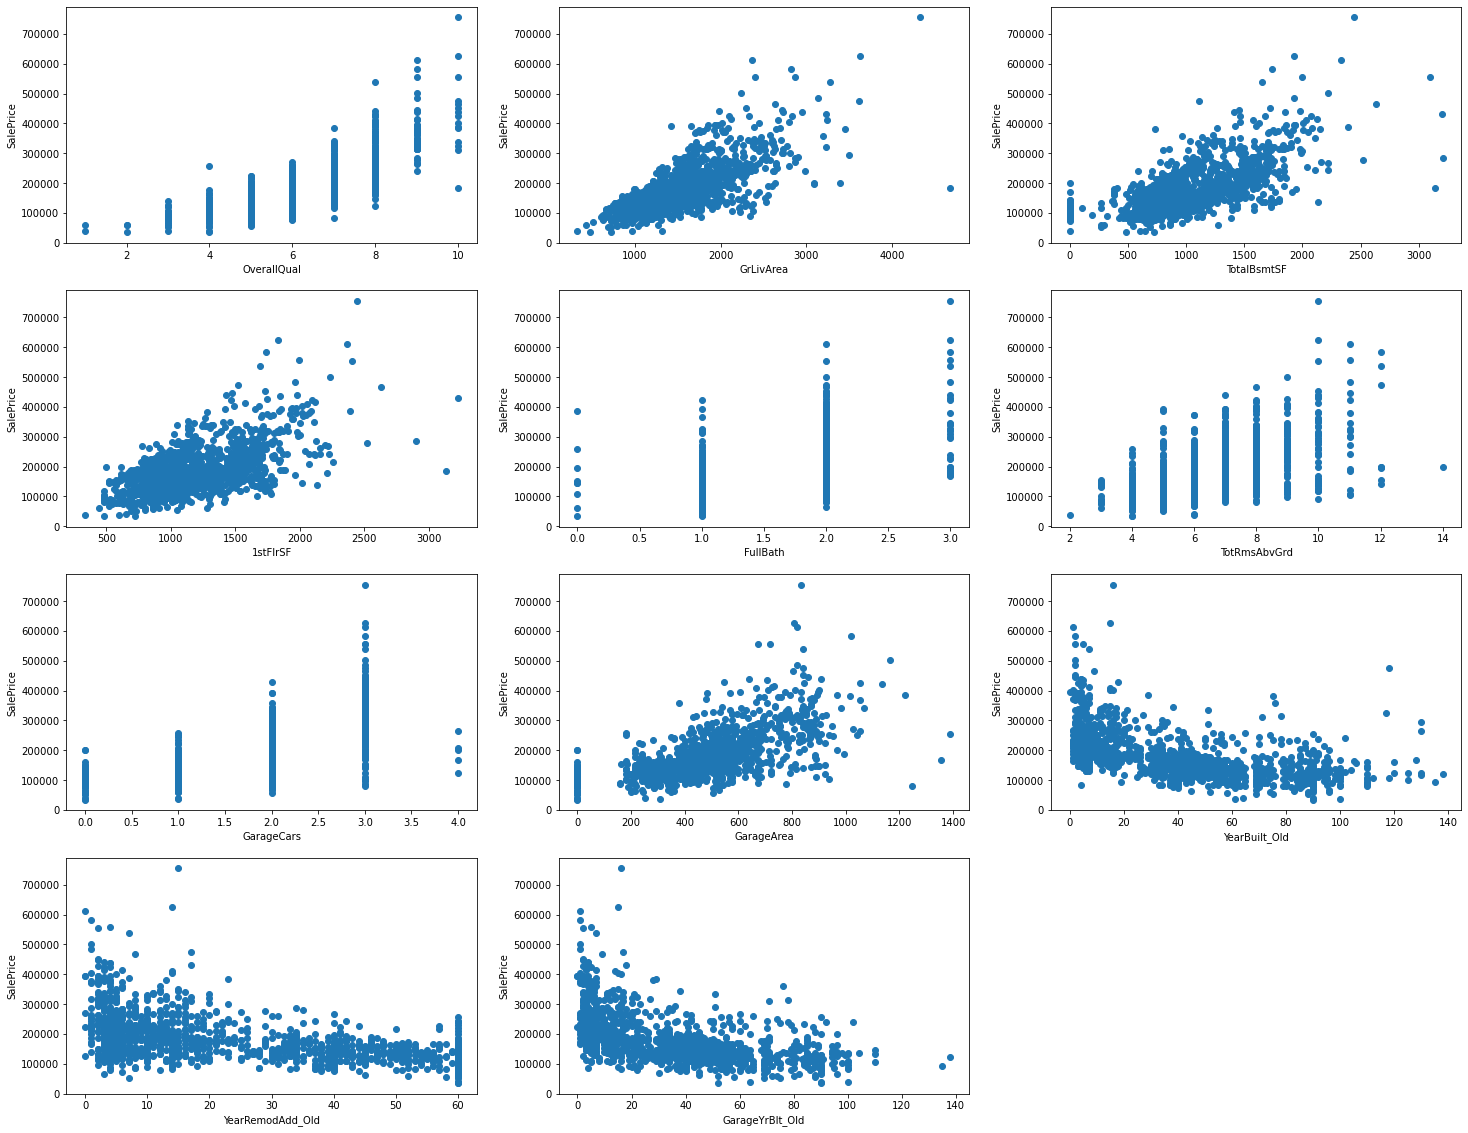

In [30]:
plt.figure(figsize=(25,20))

lt = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 
      'GarageArea', 'YearBuilt_Old', 'YearRemodAdd_Old', 'GarageYrBlt_Old']

i = 1
for x in lt:
    plt.subplot(4,3,i)
    plt.scatter(df[x], df.SalePrice)
    plt.xlabel(x)
    plt.ylabel('SalePrice')
    i += 1

plt.show()

#### Let's plot a distribution plot on target variable SalePrice

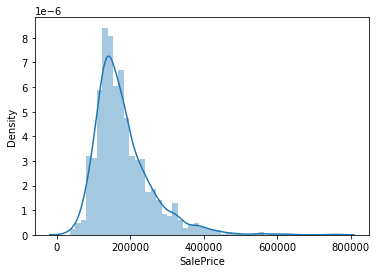

In [31]:
sns.distplot(df.SalePrice)
plt.show()

Here we can see that the target variable is almost normal distribution with little positive skewness

### Transofrming Data

__Creating Dummies__

In [32]:
cat_col = list(df.dtypes[df.dtypes =='object'].index)
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [33]:
df[cat_col].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


__creating and joining dummy columns__

In [34]:
dummy_col = pd.get_dummies(df[cat_col], drop_first=True)

df = pd.concat([df, dummy_col], axis='columns')

df = df.drop(cat_col, axis='columns')

### Splitting train and test data sets

In [35]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

### Scaling data sets

Using MinMaxScaler for scaling the variables

In [36]:
cols = df.columns

In [37]:
scaler = MinMaxScaler()

df_train[cols] = scaler.fit_transform(df_train[cols])
df_test[cols] = scaler.transform(df_test[cols])

In [38]:
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
125,1.000000,0.078893,0.555556,0.857143,0.000000,0.223949,0.0,0.013934,0.162196,0.064271,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
686,0.235294,0.128230,0.666667,0.571429,0.000000,0.000000,0.0,0.405945,0.272614,0.186593,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1314,0.000000,0.099192,0.333333,0.571429,0.000000,0.334552,0.0,0.100325,0.295696,0.212163,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
147,0.235294,0.118124,0.666667,0.428571,0.112500,0.000000,0.0,0.410590,0.275733,0.190048,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
690,0.588235,0.045004,0.555556,0.428571,0.091875,0.318556,0.0,0.070135,0.264504,0.177609,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
df_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
57,0.235294,0.148932,0.666667,0.428571,0.00000,0.000000,0.0,0.399443,0.268247,0.181755,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
639,0.588235,0.038612,0.777778,0.428571,0.00000,0.527422,0.0,0.169995,0.474111,0.426054,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
363,0.823529,0.005471,0.555556,0.857143,0.31875,0.074040,0.0,0.149094,0.150655,0.051486,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
912,0.058824,0.069391,0.444444,0.714286,0.00000,0.223492,0.0,0.129587,0.239551,0.235314,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1443,0.058824,0.108752,0.555556,0.571429,0.00000,0.000000,0.0,0.442174,0.296943,0.213545,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Let's check distribution after scaling

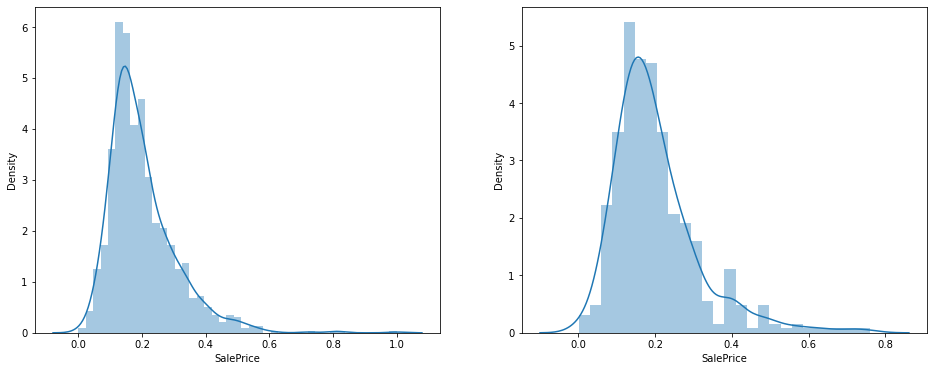

In [40]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.distplot(df_train.SalePrice)

plt.subplot(122)
sns.distplot(df_test.SalePrice)

plt.show()

Both train and test sets show similarities so, we can proceed with these data sets

### Splitting X and y variables

In [90]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [42]:
y_test = df_test.pop('SalePrice')
X_test = df_test

### Feature selection using RFE

In [43]:
df.shape

(1432, 230)

We have around 230 columns. Obvisously not all these variables are usefull for our model. Let's eliminate variables using RFE

In [44]:
# creating linear regression model and then use this with RFE
lm  = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 75)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=75)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 98),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 133),
 ('BsmtHalfBath', False, 134),
 ('FullBath', False, 47),
 ('HalfBath', False, 137),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 93),
 ('GarageCars', False, 136),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 80),
 ('OpenPorchSF', False, 108),
 ('EnclosedPorch', False, 97),
 ('3SsnPorch', False, 79),
 ('ScreenPorch', False, 43),
 ('PoolArea', True, 1),
 ('MiscVal', False, 42),
 ('MoSold', False, 92),
 ('YearBuilt_Old', True, 1),
 ('YearRemodAdd_Old', False, 57),
 ('GarageYrBlt_Old', False, 110),
 ('YrSold_Old', False, 135),
 ('MSZoning_FV', False, 4),
 ('MSZonin

In [46]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [47]:
rfe_sel_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'PoolArea',
 'YearBuilt_Old',
 'MSZoning_RL',
 'MSZoning_RM',
 'Utilities_NoSeWa',
 'LandSlope_Sev',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_RRAe',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Plywood',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_Wood',
 'BsmtCond_Po',
 'BsmtExposure_Gd',
 'Heating_GasA',
 

__Lets filter the train and test data sets with RFE selected columns__

In [48]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [49]:
X_train.shape

(1002, 75)

In [50]:
X_test.shape

(430, 75)

### Building Lasso Model

In [51]:
# to build Lasso, we first take a random hyperparameter 'lambda/alpha' value and create a model
lm = Lasso(alpha=0.0001)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.9203164697418522
0.8301669905107356


We see, there is a distinguisable difference between train and test scores.. let's try to tune a hyper parameter with K-Fold GridCVSearch and see any other values gives good results

In [52]:
lasso_folds = KFold(n_splits=20, shuffle=True, random_state=50)

lasso_hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}

lasso_model = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso_model,
                        param_grid=lasso_hyper_param,
                        scoring='r2',
                        cv=lasso_folds,
                        verbose=1,
                        return_train_score=True
                       )

lasso_model_cv.fit(X_train,y_train)

Fitting 20 folds for each of 6 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.5s finished


GridSearchCV(cv=KFold(n_splits=20, random_state=50, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [53]:
lasso_cv_result_l = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_result_l['param_alpha'] = lasso_cv_result_l['param_alpha'].astype('float32')
lasso_cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,mean_train_score,std_train_score
0,0.021272,0.005760,0.003421,0.001894,0.0001,{'alpha': 0.0001},0.885815,0.888180,0.911774,0.871036,...,0.922106,0.919978,0.920594,0.919988,0.921197,0.921608,0.920457,0.919949,0.920816,0.001003
1,0.006098,0.002009,0.002536,0.001986,0.0010,{'alpha': 0.001},0.858492,0.856146,0.909601,0.808335,...,0.869539,0.867011,0.866658,0.867923,0.868810,0.867821,0.866340,0.864914,0.866835,0.001884
2,0.005104,0.003616,0.002605,0.002917,0.0100,{'alpha': 0.01},0.435978,0.433683,0.453121,0.269778,...,0.355743,0.357681,0.356008,0.365352,0.362829,0.355728,0.353620,0.348619,0.356462,0.003936
3,0.004268,0.002461,0.003255,0.002698,0.1000,{'alpha': 0.1},-0.021565,-0.003892,-0.016825,-0.013305,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004362,0.002577,0.002584,0.002303,1.0000,{'alpha': 1.0},-0.021565,-0.003892,-0.016825,-0.013305,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


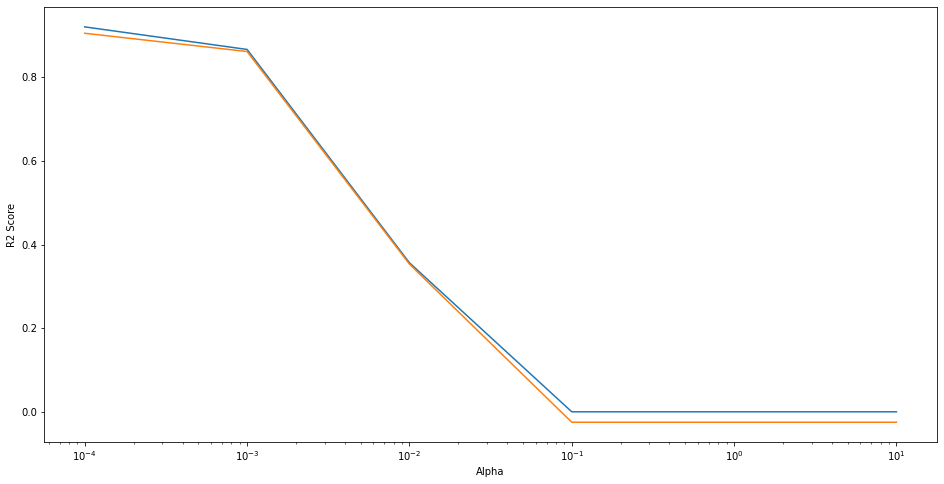

In [54]:
# let's plot a graph to see how thw hyperparameters effects the mean scores
plt.figure(figsize=(16,8))
plt.plot(lasso_cv_result_l['param_alpha'],lasso_cv_result_l['mean_train_score'])
plt.plot(lasso_cv_result_l['param_alpha'],lasso_cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [55]:
# let's check the best r2 score from the model cv
lasso_model_cv.best_params_

{'alpha': 0.0001}

It seems alpha = 0.0001 is the best parameter here

Let's build a final Lasso model with alpha = 0.0001

In [56]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9203164697418522
0.8301669905107356


In [57]:
# let's check the coefficient values for the selected alpha

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [58]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
12,GrLivArea,0.299747
2,OverallQual,0.118776
39,Street_Pave,0.091141
8,TotalBsmtSF,0.070684
1,LotArea,0.058622
5,BsmtFinSF1,0.057817
3,OverallCond,0.055363
16,HalfBath,0.047991
24,OpenPorchSF,0.044629
25,EnclosedPorch,0.040786


In [59]:
lasso_coef.sort_values(by='Coef',ascending=True).head(10)

,Featuere,Coef
18,KitchenAbvGr,-0.074453
14,BsmtHalfBath,-0.060135
13,BsmtFullBath,-0.039772
49,LotConfig_FR3,-0.036507
61,Neighborhood_IDOTRR,-0.035891
60,Neighborhood_Gilbert,-0.034173
33,GarageYrBlt_Old,-0.028666
59,Neighborhood_Edwards,-0.028200
48,LotConfig_FR2,-0.026713
47,LotConfig_CulDSac,-0.024671


In [60]:
lasso_coef[lasso_coef['Coef'] == 0].count()

Featuere    34
Coef        34
dtype: int64

As we can see, there are some + correlated and - correlated variables. Also, Lasos removed some variales

### Ridge model

In [61]:
# let's build a sample ridge model with alpha=0.001

ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train, y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.9290517169017956
0.8151679424640229


lets try to improve our model with the optimal value of alpha using GridSearchCV

In [62]:
ridge_folds = KFold(n_splits=10,shuffle=True,random_state=100)

ridge_hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,20.0]}

ridge_model = Ridge()

ridge_model_cv = GridSearchCV(estimator=ridge_model,
                        param_grid=ridge_hyper_param,
                        scoring='r2',
                        cv=ridge_folds,
                        verbose=1,
                        return_train_score=True)

ridge_model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [63]:
cv_result_r = pd.DataFrame(ridge_model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005097,0.001861,0.002500,0.001119,0.0001,{'alpha': 0.0001},0.947730,0.915296,0.882715,0.929308,...,0.932085,0.927598,0.931585,0.929734,0.930182,0.930454,0.929360,0.932497,0.929859,0.001895
1,0.003805,0.001167,0.002900,0.001514,0.0010,{'alpha': 0.001},0.947737,0.915297,0.882726,0.929307,...,0.932085,0.927598,0.931585,0.929734,0.930182,0.930454,0.929359,0.932497,0.929859,0.001895
2,0.004565,0.001760,0.002399,0.001113,0.0100,{'alpha': 0.01},0.947801,0.915317,0.882831,0.929292,...,0.932083,0.927596,0.931583,0.929732,0.930180,0.930452,0.929354,0.932496,0.929856,0.001895
3,0.003320,0.001959,0.001709,0.001967,0.1000,{'alpha': 0.1},0.948267,0.915696,0.883706,0.928785,...,0.931921,0.927440,0.931453,0.929587,0.930013,0.930264,0.929065,0.932424,0.929694,0.001913
4,0.003031,0.002475,0.003614,0.002000,1.0000,{'alpha': 1.0},0.948800,0.920896,0.887516,0.921920,...,0.928615,0.924388,0.928427,0.926484,0.926747,0.926757,0.925527,0.930461,0.926577,0.002123


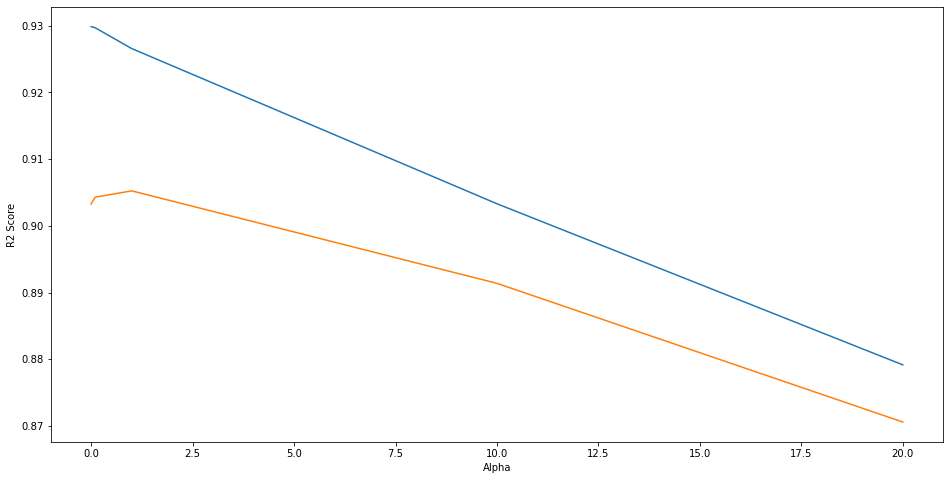

In [64]:
# plotting graph to see how alpha makes mean scores behave

plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [65]:
# Checking the best parameter(Alpha value)
ridge_model_cv.best_params_

{'alpha': 1.0}

We can see alpha = 1.0 is the best hyper parameter here

Let's build a final Ridge model with alpha = 1.0

In [66]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9260062469750598
0.8301141634575016


In [67]:
# also, let's checkpout coefficients
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [68]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
12,GrLivArea,0.125742
9,1stFlrSF,0.124451
2,OverallQual,0.105430
39,Street_Pave,0.088147
10,2ndFlrSF,0.076926
1,LotArea,0.068074
5,BsmtFinSF1,0.067409
8,TotalBsmtSF,0.062403
74,Neighborhood_StoneBr,0.059428
0,MSSubClass,0.055573


In [69]:
ridge_coef.sort_values(by='Coef',ascending=True).head(10)

,Feaure,Coef
18,KitchenAbvGr,-0.075192
14,BsmtHalfBath,-0.068577
13,BsmtFullBath,-0.049897
62,Neighborhood_MeadowV,-0.049504
41,LotShape_IR3,-0.043704
49,LotConfig_FR3,-0.042466
61,Neighborhood_IDOTRR,-0.038582
47,LotConfig_CulDSac,-0.037771
60,Neighborhood_Gilbert,-0.036551
22,GarageArea,-0.036387


In [70]:
ridge_coef[ridge_coef['Coef'] == 0].count()

Feaure    8
Coef      8
dtype: int64

#### For both the models we can see the r2_scores are very similar. As, we can see lasso model eliminated around 34 features which are not necessary.<br>
#### This will make the model simpler compared to Ridge model.

__So, Let's take Lasso model as our final model__

### Final Model

In [71]:
final = Lasso(alpha=0.0001)
final.fit(X_train,y_train)

y_train_pred = final.predict(X_train)
y_test_pred = final.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9203164697418522
0.8301669905107356


In [72]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [73]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
12,GrLivArea,0.299747
2,OverallQual,0.118776
39,Street_Pave,0.091141
8,TotalBsmtSF,0.070684
1,LotArea,0.058622
5,BsmtFinSF1,0.057817
3,OverallCond,0.055363
16,HalfBath,0.047991
24,OpenPorchSF,0.044629
25,EnclosedPorch,0.040786


In [74]:
lasso_coef.sort_values(by='Coef',ascending=True).head(10)

,Featuere,Coef
18,KitchenAbvGr,-0.074453
14,BsmtHalfBath,-0.060135
13,BsmtFullBath,-0.039772
49,LotConfig_FR3,-0.036507
61,Neighborhood_IDOTRR,-0.035891
60,Neighborhood_Gilbert,-0.034173
33,GarageYrBlt_Old,-0.028666
59,Neighborhood_Edwards,-0.028200
48,LotConfig_FR2,-0.026713
47,LotConfig_CulDSac,-0.024671


#### Best 5 features

GrLivArea,<br>
OverallQual, <br>
Street_Pave, <br>
KitchenAbvGr, <br>
TotalBsmtSF

#### Best alpha for Lasso: 0.0001

#### Best alpha for Ridge: 1.0

### Part 2 models

In [75]:
# double the alpha

lasso_2 = Lasso(alpha=0.0002)
lasso_2.fit(X_train,y_train)

y_train_pred = lasso_2.predict(X_train)
y_test_pred = lasso_2.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9142932227899827
0.8279351117473406


In [76]:
model_param_2 = list(lasso_2.coef_)
model_param_2.insert(0,lasso_2.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_2_coef = pd.DataFrame(list(zip(cols,model_param_2)))
lasso_2_coef.columns = ['Featuere','Coef']
lasso_2_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
12,GrLivArea,0.293923
2,OverallQual,0.134321
39,Street_Pave,0.075744
8,TotalBsmtSF,0.073478
5,BsmtFinSF1,0.059538
3,OverallCond,0.052230
16,HalfBath,0.050136
1,LotArea,0.045352
24,OpenPorchSF,0.041297
25,EnclosedPorch,0.040026


In [79]:
ridge_2 = Ridge(alpha = 2.0)
ridge_2.fit(X_train,y_train)

y_pred_train = ridge_2.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge_2.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9232970108134547
0.8335453715310012


In [80]:
# also, let's checkpout coefficients
model_parameter_2 = list(ridge_2.coef_)
model_parameter_2.insert(0,ridge_2.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_2_coef = pd.DataFrame(list(zip(cols,model_parameter_2)))
ridge_2_coef.columns = ['Feaure','Coef']
ridge_2_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
12,GrLivArea,0.114977
9,1stFlrSF,0.111187
2,OverallQual,0.105742
39,Street_Pave,0.079873
10,2ndFlrSF,0.073556
5,BsmtFinSF1,0.068824
8,TotalBsmtSF,0.064238
1,LotArea,0.062043
16,HalfBath,0.053691
3,OverallCond,0.051848


Q-3: remove 5 most imp variables and recreate model

In [86]:
df.drop(['GrLivArea',
'OverallQual',
'Street_Pave',
'KitchenAbvGr',
'TotalBsmtSF'], axis='columns',inplace=True)

In [87]:
df.shape

(1432, 225)

In [95]:
# splitting train and test data
df_train3, df_test3 = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [96]:
# scaling
cols = df.columns
scaler = MinMaxScaler()

df_train3[cols] = scaler.fit_transform(df_train3[cols])
df_test3[cols] = scaler.transform(df_test3[cols])

In [97]:
# splitting X and y
y_train = df_train3.pop('SalePrice')
X_train = df_train

y_test = df_test3.pop('SalePrice')
X_test = df_test

In [98]:
# feature selection
# creating linear regression model and then use this with RFE
lm  = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 75)
rfe.fit(X_train,y_train)
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [102]:
# building model

lasso_3 = Lasso(alpha=0.0001)
lasso_3.fit(X_train, y_train)

y_train_pred = lasso_3.predict(X_train)
y_test_pred = lasso_3.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9198110759285782
0.8280614148837265


In [103]:
model_param_3 = list(lasso_3.coef_)
model_param_3.insert(0,lasso_3.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param_3)))
lasso_coef.columns = ['Featuere','Coef']

In [104]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
7,1stFlrSF,0.293338
8,2ndFlrSF,0.163779
35,LotShape_IR2,0.100979
4,BsmtFinSF1,0.084912
0,MSSubClass,0.077456
2,OverallCond,0.062385
1,LotArea,0.052170
10,BsmtFullBath,0.046603
23,ScreenPorch,0.046245
20,OpenPorchSF,0.045849


In [105]:
lasso_coef.sort_values(by='Coef',ascending=True).head(10)

,Featuere,Coef
12,FullBath,-0.088814
42,LotConfig_CulDSac,-0.039936
58,Neighborhood_Mitchel,-0.038906
56,Neighborhood_IDOTRR,-0.038170
28,YearRemodAdd_Old,-0.037898
57,Neighborhood_MeadowV,-0.036124
46,LandSlope_Mod,-0.035240
45,LotConfig_Inside,-0.031854
40,LandContour_Lvl,-0.031342
29,GarageYrBlt_Old,-0.030051
